In [1]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [93]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
predict_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
train_dir = 'C:/pytest/image/seg_train/'
test_dir = 'C:/pytest/image/seg_test/'
pred_dir = 'C:/pytest/image/seg_pred/'

In [57]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(20,20), batch_size=100, class_mode='categorical', classes=['buildings','forest','glacier','mountain','sea','street'])
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(20,20), batch_size=100, class_mode='categorical', classes=['buildings','forest','glacier','mountain','sea','street'])

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 0 images belonging to 6 classes.


In [94]:
pred_generator = predict_datagen.flow_from_directory(pred_dir, target_size=(20,20), class_mode=None)

Found 7301 images belonging to 1 classes.


In [49]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=(20,20,3), activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(6, activation='softmax'))

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [51]:
history = model.fit(train_generator, steps_per_epoch=20, epochs=30)

Epoch 1/30
20/20 [==============================] - 2s 109ms/step - loss: 1.6261 - acc: 0.3420
Epoch 2/30
20/20 [==============================] - 2s 99ms/step - loss: 1.3929 - acc: 0.4605
Epoch 3/30
20/20 [==============================] - 2s 94ms/step - loss: 1.3186 - acc: 0.4747
Epoch 4/30
20/20 [==============================] - 2s 98ms/step - loss: 1.2519 - acc: 0.5150
Epoch 5/30
20/20 [==============================] - 2s 99ms/step - loss: 1.1959 - acc: 0.5405
Epoch 6/30
20/20 [==============================] - 2s 105ms/step - loss: 1.1998 - acc: 0.5320
Epoch 7/30
20/20 [==============================] - 2s 103ms/step - loss: 1.1746 - acc: 0.5395
Epoch 8/30
20/20 [==============================] - 2s 105ms/step - loss: 1.1219 - acc: 0.5650
Epoch 9/30
20/20 [==============================] - 2s 99ms/step - loss: 1.0866 - acc: 0.5825
Epoch 10/30
20/20 [==============================] - 2s 101ms/step - loss: 1.1075 - acc: 0.5700
Epoch 11/30
20/20 [==============================] - 2

In [97]:
model.evaluate(test_generator)

30/30 [==============================] - 2s 50ms/step - loss: 0.9086 - acc: 0.6677


[0.9085619449615479, 0.6676666736602783]

In [75]:
model.predict_classes(test_generator)

array([2, 5, 5, ..., 3, 0, 5], dtype=int64)

In [61]:
folder = 'C:/pytest/image/seg_pred/'
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder,f))]
print('Working with {0} images'.format(len(files)))

Working with 7301 images


10004.jpg


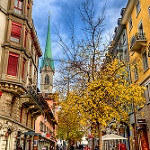

10005.jpg


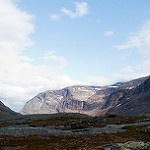

In [62]:
for i in range(0,2):
    print(files[i])
    display(_Imgdis(filename=folder+'/'+files[i],width=20,height=20))

In [63]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

file_names = []

for _file in files:
    file_names.append(_file)

print('Files in folder: %d' % len(file_names))

Files in folder: 7301


In [64]:
os.chdir(folder)
img = load_img(file_names[0])
print('Original:' ,type(img))

img_array = img_to_array(img)

print('Numpy array info:')
print(type(img_array))
print('type:', img_array.dtype)
print('shape:', img_array.shape)

Original: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Numpy array info:
<class 'numpy.ndarray'>
type: float32
shape: (150, 150, 3)


In [67]:
image_height = 20
image_width = 20
channels = 3

dataset = np.ndarray(shape=(len(file_names), image_height, image_width, channels), dtype=np.int32)
print(dataset.shape)

(7301, 20, 20, 3)


In [70]:
import os

if not os.path.exists(os.path.join(folder, 'new/')):
    os.makedirs(os.path.join(folder,'new/'))

In [71]:
from PIL import Image

for count, item in enumerate(file_names):
    img = load_img(file_names[count])
    img = img.resize((20,20), Image.ANTIALIAS)
    img.save(fp=os.path.join(folder, 'new/')+file_names[count])

c:\project\venv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  """


In [72]:
for count, item in enumerate(file_names):
    img = load_img(os.path.join(folder, 'new/')+file_names[count])
    img_array = img_to_array(img)
    dataset[count] = img_array

    if count % 500 == 0:
        print('%d images to array' % count)
print('All images to array!')

0 images to array
500 images to array
1000 images to array
1500 images to array
2000 images to array
2500 images to array
3000 images to array
3500 images to array
4000 images to array
4500 images to array
5000 images to array
5500 images to array
6000 images to array
6500 images to array
7000 images to array
All images to array!


In [91]:
file_names[1]

'10005.jpg'

In [74]:
pred = model.predict_classes(dataset)

In [103]:
tmp = np.expand_dims(dataset[0],axis=0)
tmp.shape

(1, 20, 20, 3)

In [105]:
model.predict(dataset)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 4.5276683e-32,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.4711845e-19, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [79]:
type(pred[0])

numpy.int64

In [82]:
save_dir = 'C:/pytest/image/'
if not os.path.exists(os.path.join(save_dir, 'seg_new/')):
    os.makedirs(os.path.join(save_dir,'seg_new/'))

In [87]:
save = 'C:/pytest/image/seg_new/'
if not os.path.exists(os.path.join(save, 'buildings/')):
    os.makedirs(os.path.join(save,'buildings/'))
if not os.path.exists(os.path.join(save, 'forest/')):
    os.makedirs(os.path.join(save,'forest/'))
if not os.path.exists(os.path.join(save, 'glacier/')):
    os.makedirs(os.path.join(save,'glacier/'))
if not os.path.exists(os.path.join(save, 'mountain/')):
    os.makedirs(os.path.join(save,'mountain/'))
if not os.path.exists(os.path.join(save, 'sea/')):
    os.makedirs(os.path.join(save,'sea/'))
if not os.path.exists(os.path.join(save, 'street/')):
    os.makedirs(os.path.join(save,'street/'))

In [92]:
for _file, _class in zip(file_names, pred):
    img = load_img(pred_dir+_file)
    if _class == 0:
        img.save(fp=os.path.join(save, 'buildings/')+'buildings_'+_file)
    elif _class == 1:
        img.save(fp=os.path.join(save, 'forest/')+'forest_'+_file)
    elif _class == 2:
        img.save(fp=os.path.join(save, 'glacier/')+'glacier_'+_file)
    elif _class == 3:
        img.save(fp=os.path.join(save, 'mountain/')+'mountain_'+_file)
    elif _class == 4:
        img.save(fp=os.path.join(save, 'sea/')+'sea_'+_file)
    elif _class == 5:
        img.save(fp=os.path.join(save, 'street/')+'street_'+_file)